In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
data = pd.read_csv("Admission_Chance.csv")

In [3]:
data.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# Select colums for x
x_col1='CGPA'
x_col2=' SOP'

In [8]:
x = data[[x_col1, x_col2]]
y = data['Chance of Admit '] 

#### Visualize Train Data

In [9]:
#Select the data
x_data= x[x_col1]
y_data= x[x_col2]
z_data= y

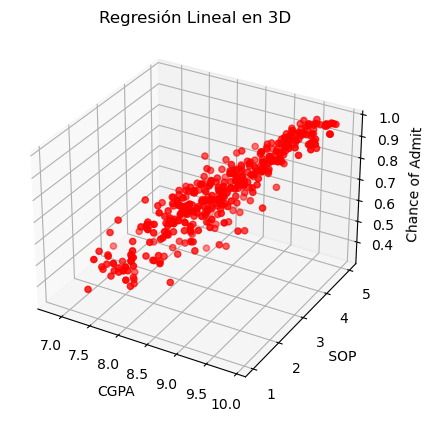

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data, y_data, z_data, color='red')  # Graficar los puntos originales

ax.set_xlabel(x.columns[0])
ax.set_ylabel(x.columns[1])
ax.set_zlabel(y.name)
plt.title("Regresión Lineal en 3D")
plt.show()


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
model.intercept_

-0.926330504890602

In [14]:
model.coef_

array([0.18642407, 0.01463811])

/home/rbernalc/miniforge3/envs/modin/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


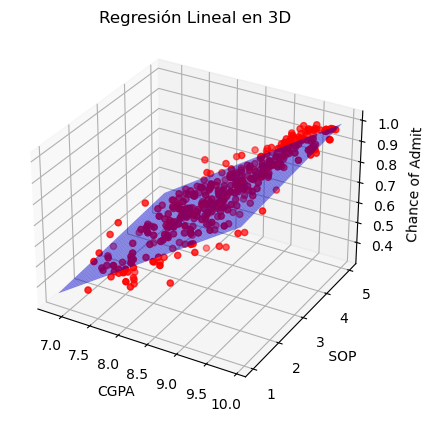

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Crea un plano
x_plane, y_plane = np.meshgrid(np.linspace(x_data.min(), x_data.max(), 100), 
                             np.linspace(y_data.min(), y_data.max(), 100))
z_plane = model.predict(np.c_[x_plane.ravel(), y_plane.ravel()])
z_plane = z_plane.reshape(x_plane.shape)


ax.scatter(x_data, y_data, z_data, color='red')  # Graficar los puntos originales
ax.plot_surface(x_plane, y_plane, z_plane, color='blue', alpha=0.5)  # Graficar el plano
ax.set_xlabel(x.columns[0])
ax.set_ylabel(x.columns[1])
ax.set_zlabel(y.name)
plt.title("Regresión Lineal en 3D")
plt.show()
